In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# EDA: Subway Delay Trends (2020–2024)

## 5. How do average platform and train delays change over time, and what months experience the worst performance in 2020-2024?


In [2]:
# import data

transit = pd.read_csv("data/MTA_Subway_Customer_Metrics_2020-2024.csv")

In [3]:
# Inspect
transit.head()

,month,division,line,period,num_passengers,additional platform time,additional train time,total_apt,total_att,over_five_mins,over_five_mins_perc,customer journey time performance
0,2024-12-01,A DIVISION,1,offpeak,5034590.0,0.962958,0.738045,4848099.5,3715755.0,643165.40,0.127749,0.872251
1,2024-12-01,A DIVISION,1,peak,5552918.0,1.020276,0.662142,5665509.0,3676820.8,624175.44,0.112405,0.887595
2,2024-12-01,A DIVISION,2,offpeak,3078700.2,1.425670,0.726788,4389210.5,2237562.2,555590.80,0.180463,0.819537
3,2024-12-01,A DIVISION,2,peak,3672602.5,1.147720,0.448690,4215117.5,1647861.6,483096.44,0.131541,0.868459
4,2024-12-01,A DIVISION,3,offpeak,2344247.5,0.984354,0.456582,2307569.0,1070340.6,293768.30,0.125315,0.874685


In [4]:
transit.describe()

,num_passengers,additional platform time,additional train time,total_apt,total_att,over_five_mins,over_five_mins_perc,customer journey time performance
count,2.856000e+03,2856.000000,2856.000000,2.856000e+03,2.856000e+03,2.856000e+03,2856.000000,2856.000000
mean,2.188061e+06,1.251518,0.276823,2.903727e+06,9.339990e+05,3.404776e+05,0.145785,0.854215
std,1.450171e+06,0.454368,0.482434,2.065435e+06,1.258208e+06,2.435442e+05,0.059847,0.059847
min,3.017300e+03,-0.431496,-2.213688,-7.396448e+03,-3.060992e+06,4.630000e+01,0.000112,0.682048
25%,1.091265e+06,0.962920,0.024190,1.284948e+06,5.169300e+03,1.451870e+05,0.107274,0.808143
50%,2.049147e+06,1.223633,0.339261,2.804886e+06,6.263841e+05,3.103827e+05,0.146694,0.853306
75%,3.184311e+06,1.540595,0.598394,4.261219e+06,1.605923e+06,5.129739e+05,0.191857,0.892726
max,8.923406e+06,3.506892,1.584780,1.462646e+07,7.841808e+06,1.274929e+06,0.317952,0.999888


In [5]:
# check for null values
transit.isnull().sum()

month                                0
division                             0
line                                 0
period                               0
num_passengers                       0
additional platform time             0
additional train time                0
total_apt                            0
total_att                            0
over_five_mins                       0
over_five_mins_perc                  0
customer journey time performance    0
dtype: int64

In [6]:

# Group by month

transit['month'] = pd.to_datetime(transit['month'])
transit['month']

0      2024-12-01
1      2024-12-01
2      2024-12-01
3      2024-12-01
4      2024-12-01
          ...    
2851   2020-01-01
2852   2020-01-01
2853   2020-01-01
2854   2020-01-01
2855   2020-01-01
Name: month, Length: 2856, dtype: datetime64[ns]

In [ ]:
# Monthly grouping 

transit['year_month'] = transit['month'].dt.to_period('M')
transit['year_month']

0       2024-12
1       2024-12
2       2024-12
3       2024-12
4       2024-12
         ...   
2851    2020-01
2852    2020-01
2853    2020-01
2854    2020-01
2855    2020-01
Name: year_month, Length: 2856, dtype: period[M]

In [ ]:
# Monthly delay by average 

monthly_delay = transit.groupby('year_month')[['additional platform time', 'additional train time']].mean()
monthly_delay

,additional platform time,additional train time
year_month,,
2020-01,1.216288,0.579473
2020-02,1.100265,0.541760
2020-03,1.101285,0.403253
2020-04,1.144160,-0.459006
2020-05,0.626020,-0.444071
2020-06,1.050083,-0.141370
2020-07,1.132896,0.013284
2020-08,1.313152,0.047042
2020-09,1.051265,-0.047075


In [11]:
# Total monthly delay

monthly_total = transit.groupby('year_month')[['total_apt', 'total_att']].sum()
monthly_total

,total_apt,total_att
year_month,,
2020-01,2.655073e+08,1.359087e+08
2020-02,1.888758e+08,9.804695e+07
2020-03,1.013666e+08,3.758955e+07
2020-04,9.074735e+06,-4.249355e+06
2020-05,1.029589e+07,-7.426452e+06
2020-06,3.243350e+07,-4.152572e+06
2020-07,4.425856e+07,5.582383e+05
2020-08,5.885611e+07,2.142447e+06
2020-09,5.101178e+07,-2.482364e+06


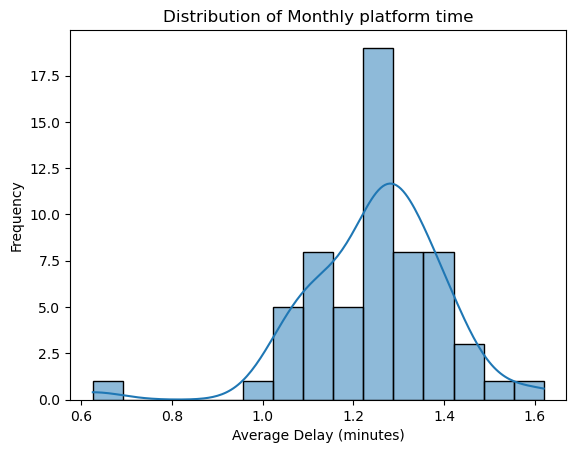

In [ ]:
# Monthly delay for platform time

sns.histplot(monthly_delay['additional platform time'], kde=True, bins=15)
plt.title('Distribution of Monthly platform time')
plt.xlabel('Average Delay (minutes)')
plt.ylabel('Frequency')
plt.show()

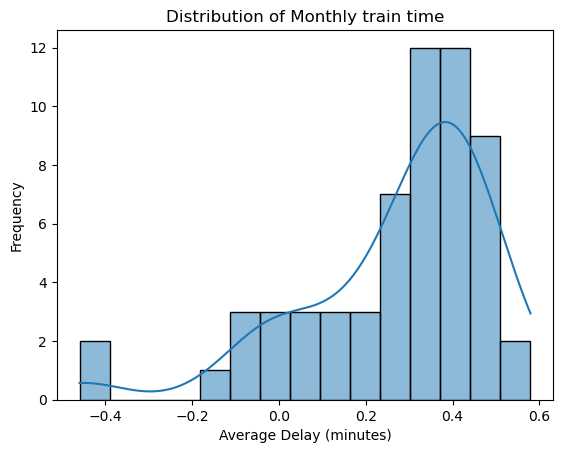

In [ ]:
# Monthly delay for train time


sns.histplot(monthly_delay['additional train time'], kde=True, bins=15)
plt.title('Distribution of Monthly train time')
plt.xlabel('Average Delay (minutes)')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 0, 'Month')

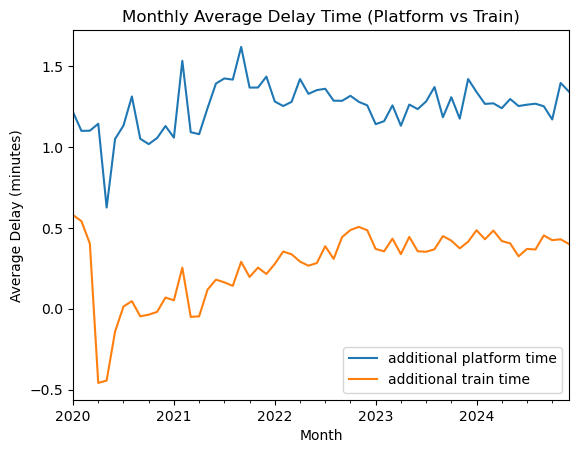

In [ ]:
# Average Platform vs Train delay time

monthly_delay[['additional platform time', 'additional train time']].plot(
    title='Monthly Average Delay Time (Platform vs Train)')
plt.ylabel("Average Delay (minutes)")
plt.xlabel("Month")


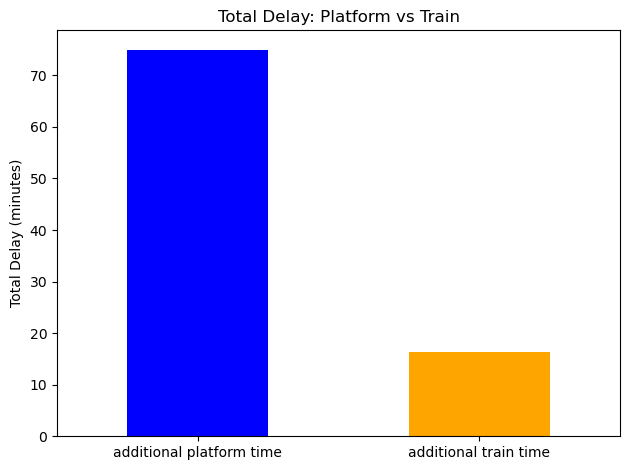

In [112]:
# Average Platform vs Train delay time 

delay_totals = monthly_delay[['additional platform time', 'additional train time']].sum()
delay_totals.plot(kind='bar', color=['blue', 'orange'], title='Total Delay: Platform vs Train')
plt.ylabel("Total Delay (minutes)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [61]:
# Pearson correlation between Platform and Train delay time

monthly_delay[["additional platform time","additional train time"]].corr()

,additional platform time,additional train time
additional platform time,1.00000,0.49725
additional train time,0.49725,1.00000


Text(0.5, 0, 'Month')

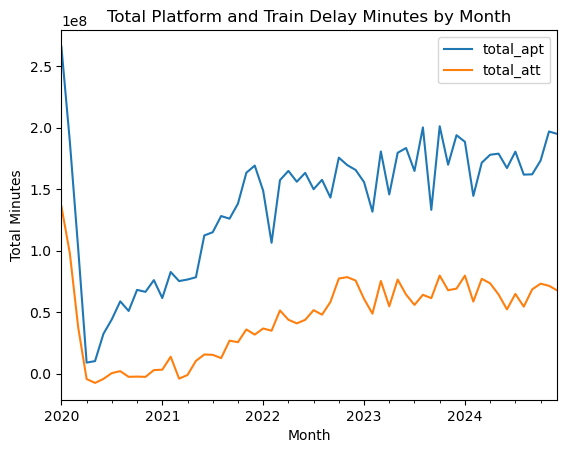

In [62]:
# Total Platform vs Train delay time

monthly_total[['total_apt', 'total_att']].plot(
  title='Total Platform and Train Delay Minutes by Month')
plt.ylabel("Total Minutes")
plt.xlabel("Month")

In [66]:

# 5 top worst months with delays 

monthly_delay['total_delay'] = monthly_delay['additional platform time'] + monthly_delay['additional train time']
worst_months = monthly_delay.sort_values(by='total_delay', ascending=False).head(5)

worst_months = worst_months.sort_values(by='year_month')

print("Top 5 Worst Months by Total Delay:")
worst_months 

Top 5 Worst Months by Total Delay:


,additional platform time,additional train time,total_delay
year_month,,,
2021-09,1.619614,0.290352,1.909966
2022-10,1.317203,0.486744,1.803947
2023-12,1.420889,0.414669,1.835558
2024-01,1.340619,0.485527,1.826146
2024-11,1.396656,0.429685,1.826341


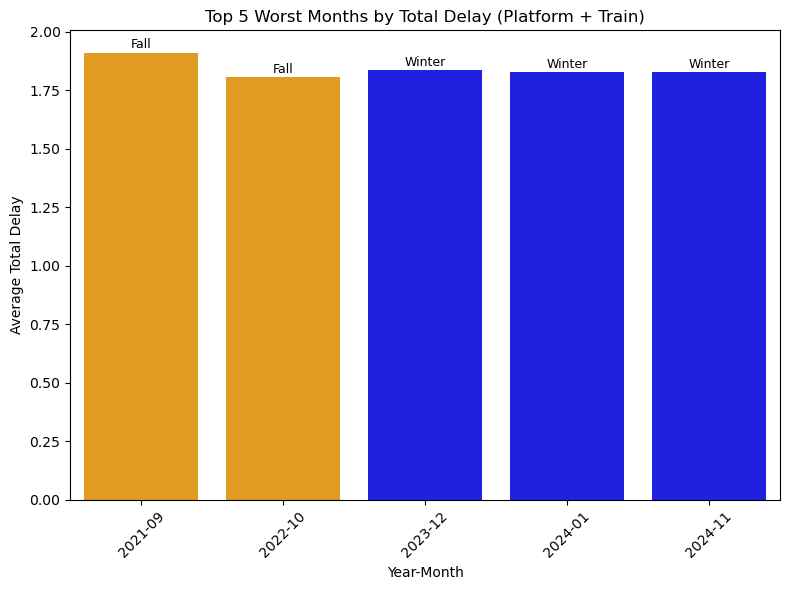

In [113]:

# Visual on Top 5 worst months in 2020-2024 

colors = ['orange', 'orange', 'blue', 'blue', 'blue']
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=worst_months, x='year_month', y='total_delay',hue='year_month', palette=colors, legend=False)
plt.title("Top 5 Worst Months by Total Delay (Platform + Train)")
plt.ylabel("Average Total Delay")
plt.xlabel("Year-Month")
plt.xticks(rotation=45)



manual_seasons = ['Fall', 'Fall', 'Winter', 'Winter', 'Winter']


for i, (idx, row) in enumerate(worst_months.iterrows()):
    ax.text(i, row['total_delay'] * 1.01, manual_seasons[i], ha='center', fontsize=9)
    
    

plt.tight_layout()
plt.show()



How do average platform and train delays change over time, and what months experience the worst performance in 2020-2024?

In 2020, the delays for platform and train delays were very low, it was close to zero delays from March to June. This was probably due to COVID and low number of customers using MTA services.

Delays started to increase in 2021, with platform delays peaking 1.62 by the end of the year. 

In 2022-2024, delays remained higher than 2020. Especially during the fall and winter months, many months exceded 1.3 of platform delay and 0.4 + of train delay.

There is a moderate positive correlation 0.50 between platform and train delays which means most of the time When platform delays go up, train delays tend to go up too.

The top worst 5 months (Sep 2021,Oct 2022, Dec 2023, Nov 2024, Jan 2024) can suggest delays occur the most during the fall and winter months. From 2020 to 2024, average platform and train delays are higher in colder months. This insight can help transit authorities target months that need more improvements such as increasing staffing and planning more scheduled MTA services for less wait time. 


